# Padmaja 19BAI1107 - PCA given dataset


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

# Loading dataset

In [4]:
df=pd.read_excel(r'PCA_dataset.xlsx',engine='openpyxl')

In [3]:
df.head()

,SampleNumber,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Target Label
0,1,3.30,7.44,1.52,3.27,0.07,2.14,0.75,0.66,0.0,...,50.7,6.55,4.09,4.26,0.01,0.00,24.7,2.7,1.6,V1
1,2,3.43,7.63,1.63,3.27,0.05,2.01,0.74,0.65,0.0,...,47.9,8.35,5.08,5.01,0.01,0.00,23.3,2.3,1.8,V1
2,3,3.41,7.32,1.52,3.18,0.07,2.09,0.80,0.70,0.0,...,54.4,9.27,6.85,7.14,0.19,0.06,25.0,2.5,-0.9,V1
3,4,3.78,7.85,1.69,3.35,0.03,1.98,0.77,0.67,0.0,...,48.9,10.26,5.96,5.47,0.05,0.01,24.1,5.6,2.1,V1
4,5,3.90,7.99,1.61,3.43,0.02,2.14,0.77,0.71,0.0,...,54.1,8.19,5.81,4.72,0.64,0.16,26.8,2.5,2.1,V1


# Exploring the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SampleNumber  400 non-null    int64  
 1   P1            400 non-null    float64
 2   P2            400 non-null    float64
 3   P3            400 non-null    float64
 4   P4            400 non-null    float64
 5   P5            400 non-null    float64
 6   P6            400 non-null    float64
 7   P7            400 non-null    float64
 8   P8            400 non-null    float64
 9   P9            400 non-null    float64
 10  P10           400 non-null    float64
 11  P11           400 non-null    float64
 12  P12           400 non-null    float64
 13  P13           400 non-null    float64
 14  P14           400 non-null    float64
 15  P15           400 non-null    float64
 16  P16           400 non-null    float64
 17  P17           400 non-null    float64
 18  P18           400 non-null    

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SampleNumber,400.0,200.500000,115.614301,1.00,100.7500,200.500,300.2500,400.00
P1,400.0,3.441575,0.395690,2.41,3.1675,3.435,3.7100,4.72
P2,400.0,7.403225,0.421662,6.28,7.1000,7.420,7.7100,8.63
P3,400.0,1.595625,0.140773,1.18,1.5200,1.610,1.6900,2.21
P4,400.0,3.123400,0.196660,2.60,3.0000,3.100,3.2700,3.69
P5,400.0,0.056550,0.015188,0.02,0.0400,0.060,0.0700,0.13
P6,400.0,1.970525,0.196999,1.22,1.8700,1.980,2.0900,2.69
P7,400.0,0.787700,0.027931,0.67,0.7700,0.790,0.8100,0.87
P8,400.0,0.690450,0.017652,0.64,0.6800,0.690,0.7000,0.76
P9,400.0,0.020500,0.092878,0.00,0.0000,0.000,0.0000,0.60


# Transforming the Target Variable

In [8]:
dict_diff={
    'V1':1,'V2':2,'V3':3,'V4':4,'V5':5,'V6':6,'V7':7,'V8':8,'V9':9,'V10':10
}

In [9]:
df['Target Label']=df['Target Label'].apply(lambda x:dict_diff[x])

In [10]:
df.head()

,SampleNumber,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Target Label
0,1,3.30,7.44,1.52,3.27,0.07,2.14,0.75,0.66,0.0,...,50.7,6.55,4.09,4.26,0.01,0.00,24.7,2.7,1.6,1
1,2,3.43,7.63,1.63,3.27,0.05,2.01,0.74,0.65,0.0,...,47.9,8.35,5.08,5.01,0.01,0.00,23.3,2.3,1.8,1
2,3,3.41,7.32,1.52,3.18,0.07,2.09,0.80,0.70,0.0,...,54.4,9.27,6.85,7.14,0.19,0.06,25.0,2.5,-0.9,1
3,4,3.78,7.85,1.69,3.35,0.03,1.98,0.77,0.67,0.0,...,48.9,10.26,5.96,5.47,0.05,0.01,24.1,5.6,2.1,1
4,5,3.90,7.99,1.61,3.43,0.02,2.14,0.77,0.71,0.0,...,54.1,8.19,5.81,4.72,0.64,0.16,26.8,2.5,2.1,1


In [11]:
df.tail()

,SampleNumber,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Target Label
395,396,3.78,7.63,1.89,2.91,0.07,1.54,0.82,0.69,0.0,...,147.0,7.78,10.44,11.53,0.02,0.01,73.2,2.9,10.7,10
396,397,3.94,7.75,1.78,3.22,0.05,1.81,0.83,0.69,0.0,...,165.6,12.58,13.42,12.30,0.01,0.00,76.3,2.2,5.2,10
397,398,3.43,7.39,1.63,3.11,0.05,1.91,0.79,0.68,0.0,...,148.6,12.81,14.65,14.40,0.01,0.00,71.6,2.9,7.6,10
398,399,3.96,7.80,1.88,3.03,0.06,1.61,0.82,0.70,0.0,...,144.1,12.03,13.00,11.39,0.00,0.00,71.9,3.2,10.4,10
399,400,4.17,8.02,1.86,3.27,0.06,1.75,0.82,0.69,0.0,...,152.8,14.24,16.01,14.09,0.09,0.02,72.0,2.9,5.8,10


# Splitting into train and test set

In [12]:
X=df.drop(labels=['SampleNumber','Target Label'],axis=1)
y=df['Target Label']

In [13]:
X

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
0,3.30,7.44,1.52,3.27,0.07,2.14,0.75,0.66,0.0,54.8,49.7,50.7,6.55,4.09,4.26,0.01,0.00,24.7,2.7,1.6
1,3.43,7.63,1.63,3.27,0.05,2.01,0.74,0.65,0.0,51.8,47.3,47.9,8.35,5.08,5.01,0.01,0.00,23.3,2.3,1.8
2,3.41,7.32,1.52,3.18,0.07,2.09,0.80,0.70,0.0,54.0,50.5,54.4,9.27,6.85,7.14,0.19,0.06,25.0,2.5,-0.9
3,3.78,7.85,1.69,3.35,0.03,1.98,0.77,0.67,0.0,57.7,47.2,48.9,10.26,5.96,5.47,0.05,0.01,24.1,5.6,2.1
4,3.90,7.99,1.61,3.43,0.02,2.14,0.77,0.71,0.0,59.1,54.1,54.1,8.19,5.81,4.72,0.64,0.16,26.8,2.5,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.78,7.63,1.89,2.91,0.07,1.54,0.82,0.69,0.0,178.1,173.0,147.0,7.78,10.44,11.53,0.02,0.01,73.2,2.9,10.7
396,3.94,7.75,1.78,3.22,0.05,1.81,0.83,0.69,0.0,182.2,183.5,165.6,12.58,13.42,12.30,0.01,0.00,76.3,2.2,5.2
397,3.43,7.39,1.63,3.11,0.05,1.91,0.79,0.68,0.0,171.8,168.4,148.6,12.81,14.65,14.40,0.01,0.00,71.6,2.9,7.6
398,3.96,7.80,1.88,3.03,0.06,1.61,0.82,0.70,0.0,175.0,168.9,144.1,12.03,13.00,11.39,0.00,0.00,71.9,3.2,10.4


In [14]:
y

0       1
1       1
2       1
3       1
4       1
       ..
395    10
396    10
397    10
398    10
399    10
Name: Target Label, Length: 400, dtype: int64

In [15]:
#Importing train test split
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Scaling the data

In [17]:
#Using standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Eigen decomposition of the covariance matrix.

In [18]:
import numpy as np
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[6.37513314e+00 3.48795668e+00 2.52761010e+00 2.33372252e+00
 1.33109968e+00 1.11797712e+00 9.05580354e-01 8.18514400e-01
 7.09417739e-01 2.12390161e-01 1.38121340e-01 7.17153261e-02
 2.36387553e-02 8.38990973e-03 6.66384891e-03 2.07332567e-03
 1.29016620e-03 2.67080501e-04 1.08640812e-04 1.43077979e-05]


# Total and explained variance

In [19]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Feature Transform

In [20]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Note: The aut added the `key=lambda k: k[0]` in the sort call above
# This is to avoid problems if there are ties in the eigenvalue
# arrays (i.e., the sorting algorithm will only regard the
# first element of the tuples, now).

In [21]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.24650629 -0.16821983]
 [-0.20783049 -0.22419444]
 [-0.20872158 -0.04785621]
 [-0.13848294 -0.25548324]
 [ 0.00315941  0.02893874]
 [ 0.08754751 -0.12813991]
 [-0.11193945  0.18611682]
 [-0.0896354   0.02639491]
 [ 0.06213814 -0.13328931]
 [-0.3530288   0.16847998]
 [-0.37385203  0.03093823]
 [-0.3716999  -0.03617245]
 [-0.00585241  0.3196547 ]
 [-0.3006498   0.23144062]
 [-0.35486855  0.01457958]
 [ 0.05967395  0.35130619]
 [ 0.06683179  0.3685069 ]
 [-0.37053719  0.08704659]
 [ 0.17527785  0.3697294 ]
 [-0.07898704  0.43979502]]


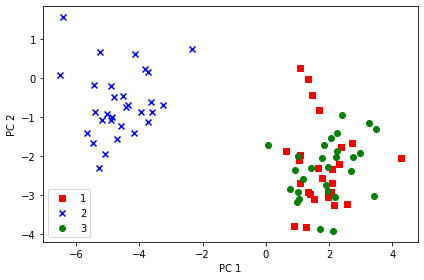

In [22]:
X_train_pca = X_train.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [23]:
X_train[0].dot(w)

array([1.35035033, 1.15188842])

# Principal component analysis in scikit-learn

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([3.17618241e-01, 1.73774985e-01, 1.25929146e-01, 1.16269390e-01,
       6.63172874e-02, 5.56992170e-02, 4.51173069e-02, 4.07795567e-02,
       3.53442052e-02, 1.05815812e-02, 6.88140248e-03, 3.57296000e-03,
       1.17771656e-03, 4.17997288e-04, 3.32002473e-04, 1.03296047e-04,
       6.42779231e-05, 1.33063321e-05, 5.41264044e-06, 7.12834933e-07])

In [25]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

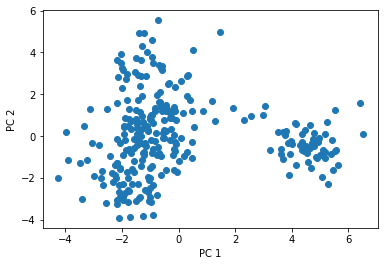

In [26]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [27]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# PCA with GridSearchCV

In [28]:
from sklearn.decomposition import PCA
pca=PCA()
param_grid={'n_components':[1,2,3,4,5,6,7,8,9,10]}
#Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [29]:
g=GridSearchCV(pca,param_grid=param_grid)

In [30]:
g.fit(X_train,y_train)

GridSearchCV(estimator=PCA(),
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [31]:
g.best_params_  #so we will be using n_components as 10 in our model

{'n_components': 10}

# Creating model after finding best parameters

In [32]:
#using PCA with best parameters
pca=PCA(n_components=10)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [35]:
#Importing the testing dataset
df1=pd.read_excel(r'PCA_dataset.xlsx', sheet_name='TestingSet',engine='openpyxl')

In [36]:
X1=df1.drop(labels=['SampleNumber','Target Label'],axis=1)
y1=df1['Target Label'].apply(lambda x: dict_diff[x])


In [37]:
#For Testing
X1=scaler.transform(X1)
X1=pca.transform(X1)

# Using Random Forests

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
#Getting Predictions:
rfcpred=rfc.predict(X1)


# Evaluating Random Forests

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [42]:
print(confusion_matrix(y1,rfcpred))

[[7 0 3 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 2]
 [4 0 6 0 0 0 0 0 0 0]
 [0 0 0 8 0 2 0 0 0 0]
 [0 0 0 2 0 0 5 3 0 0]
 [0 0 0 1 1 4 0 2 2 0]
 [0 0 0 0 0 0 5 5 0 0]
 [0 0 0 1 0 0 1 8 0 0]
 [0 0 0 3 1 0 0 3 3 0]
 [0 1 0 0 0 0 0 0 0 9]]


In [43]:
a1=accuracy_score(y1,rfcpred)
print(a1)

0.58


In [44]:
print(classification_report(y1,rfcpred))

              precision    recall  f1-score   support

           1       0.64      0.70      0.67        10
           2       0.89      0.80      0.84        10
           3       0.67      0.60      0.63        10
           4       0.53      0.80      0.64        10
           5       0.00      0.00      0.00        10
           6       0.67      0.40      0.50        10
           7       0.45      0.50      0.48        10
           8       0.38      0.80      0.52        10
           9       0.60      0.30      0.40        10
          10       0.82      0.90      0.86        10

    accuracy                           0.58       100
   macro avg       0.56      0.58      0.55       100
weighted avg       0.56      0.58      0.55       100



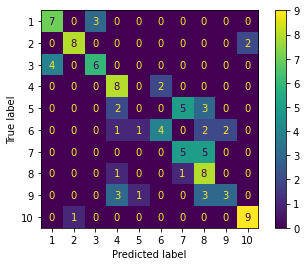

In [45]:
plot_confusion_matrix(rfc,X1,y1)

In [46]:
#Defining a function for showing results:(for future models so we dont have to keep typing the same set of commands)
def result(model,prediction):
    print('Accuracy Score:',accuracy_score(y1,prediction))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y1,prediction))
    print('\n')
    print('Classification report:\n',classification_report(y1,prediction))
    plot_confusion_matrix(model,X1,y1)

# Using SVC

In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X1)

# Evaluating SVC

In [49]:
a2=accuracy_score(y1,svc_pred)
print(a2)

0.51


Accuracy Score: 0.51


Confusion Matrix:
 [[7 0 3 0 0 0 0 0 0 0]
 [0 0 2 0 0 7 0 0 0 1]
 [5 0 5 0 0 0 0 0 0 0]
 [0 0 0 8 0 2 0 0 0 0]
 [0 0 0 2 0 0 5 3 0 0]
 [0 0 0 2 2 4 0 0 2 0]
 [0 0 0 0 0 0 6 4 0 0]
 [0 0 0 1 0 0 1 8 0 0]
 [0 0 0 3 1 2 0 0 4 0]
 [0 1 0 0 0 0 0 0 0 9]]


Classification report:
               precision    recall  f1-score   support

           1       0.58      0.70      0.64        10
           2       0.00      0.00      0.00        10
           3       0.50      0.50      0.50        10
           4       0.50      0.80      0.62        10
           5       0.00      0.00      0.00        10
           6       0.27      0.40      0.32        10
           7       0.50      0.60      0.55        10
           8       0.53      0.80      0.64        10
           9       0.67      0.40      0.50        10
          10       0.90      0.90      0.90        10

    accuracy                           0.51       100
   macro avg       0.45      0.51      0.47       1

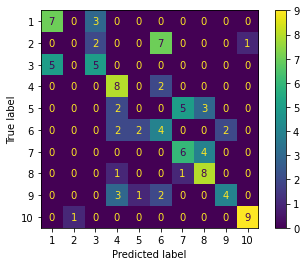

In [50]:
result(svc,svc_pred)

# Using AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)
abpred=ab.predict(X1)

# Evaluating Adaboost

In [53]:
a3=accuracy_score(y1,abpred)
print(a3)

0.27


Accuracy Score: 0.27


Confusion Matrix:
 [[ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  5  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  7  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10]]


Classification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.15      1.00      0.26        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.58      0.70      0.64        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.50      1.00      0.67        10

    a

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


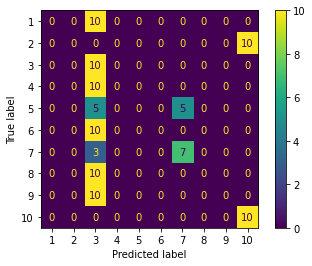

In [54]:
result(ab,abpred)

# Using GradientDescent Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gd=GradientBoostingClassifier()
gd.fit(X_train,y_train)
gdpred=gd.predict(X1)

# Evaluating GradientBoosting

In [57]:
a4=accuracy_score(y1,gdpred)
print(a4)

0.59


Accuracy Score: 0.59


Confusion Matrix:
 [[7 0 3 0 0 0 0 0 0 0]
 [0 7 1 0 0 0 0 0 0 2]
 [4 0 6 0 0 0 0 0 0 0]
 [0 0 0 7 0 3 0 0 0 0]
 [0 0 0 2 1 0 5 2 0 0]
 [0 0 0 4 1 4 0 0 1 0]
 [0 0 0 0 0 0 7 3 0 0]
 [0 0 0 1 0 1 0 8 0 0]
 [0 0 0 4 0 2 0 1 3 0]
 [0 1 0 0 0 0 0 0 0 9]]


Classification report:
               precision    recall  f1-score   support

           1       0.64      0.70      0.67        10
           2       0.88      0.70      0.78        10
           3       0.60      0.60      0.60        10
           4       0.39      0.70      0.50        10
           5       0.50      0.10      0.17        10
           6       0.40      0.40      0.40        10
           7       0.58      0.70      0.64        10
           8       0.57      0.80      0.67        10
           9       0.75      0.30      0.43        10
          10       0.82      0.90      0.86        10

    accuracy                           0.59       100
   macro avg       0.61      0.59      0.57       1

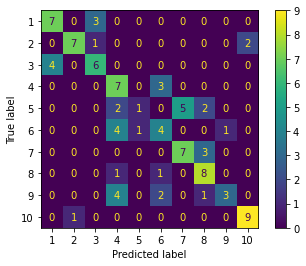

In [58]:
result(gd,gdpred)

# Using Decision Trees

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dtpred=dt.predict(X1)

# Evaluating Decision Tree

In [61]:
a5=accuracy_score(y1,dtpred)
print(a5)

0.5


Accuracy Score: 0.5


Confusion Matrix:
 [[4 0 5 0 0 0 0 0 1 0]
 [0 4 0 0 0 0 0 0 0 6]
 [4 0 5 1 0 0 0 0 0 0]
 [0 0 1 6 1 0 0 1 1 0]
 [0 0 0 1 4 1 4 0 0 0]
 [0 0 0 3 0 2 0 2 3 0]
 [0 0 1 0 0 0 7 2 0 0]
 [0 0 0 1 2 0 0 7 0 0]
 [0 0 1 2 2 0 0 2 3 0]
 [0 2 0 0 0 0 0 0 0 8]]


Classification report:
               precision    recall  f1-score   support

           1       0.50      0.40      0.44        10
           2       0.67      0.40      0.50        10
           3       0.38      0.50      0.43        10
           4       0.43      0.60      0.50        10
           5       0.44      0.40      0.42        10
           6       0.67      0.20      0.31        10
           7       0.64      0.70      0.67        10
           8       0.50      0.70      0.58        10
           9       0.38      0.30      0.33        10
          10       0.57      0.80      0.67        10

    accuracy                           0.50       100
   macro avg       0.52      0.50      0.49       10

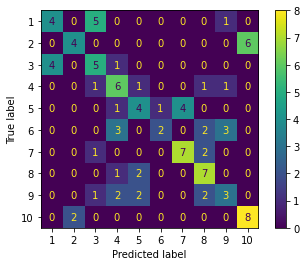

In [62]:
result(dt,dtpred)

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knnpred=knn.predict(X1)

# Evaluating KNN

In [65]:
a6=accuracy_score(y1,knnpred)
print(a6)

0.44


Accuracy Score: 0.44


Confusion Matrix:
 [[7 0 3 0 0 0 0 0 0 0]
 [0 1 8 0 1 0 0 0 0 0]
 [3 0 7 0 0 0 0 0 0 0]
 [0 0 1 6 1 1 0 0 1 0]
 [0 0 0 2 1 0 5 2 0 0]
 [0 0 1 3 5 0 0 0 1 0]
 [0 0 0 0 0 0 5 5 0 0]
 [0 0 0 1 0 0 2 7 0 0]
 [0 0 0 4 3 1 0 0 2 0]
 [0 2 0 0 0 0 0 0 0 8]]


Classification report:
               precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.33      0.10      0.15        10
           3       0.35      0.70      0.47        10
           4       0.38      0.60      0.46        10
           5       0.09      0.10      0.10        10
           6       0.00      0.00      0.00        10
           7       0.42      0.50      0.45        10
           8       0.50      0.70      0.58        10
           9       0.50      0.20      0.29        10
          10       1.00      0.80      0.89        10

    accuracy                           0.44       100
   macro avg       0.43      0.44      0.41       1

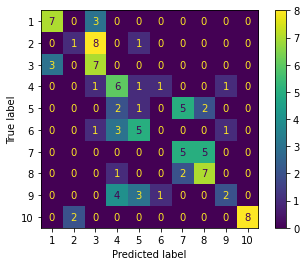

In [66]:
result(knn,knnpred)

# Using Logistics Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lor=LogisticRegression(max_iter=1000)
lor.fit(X_train,y_train)
lrpred=lor.predict(X1)

# Evaluation Logistic Regression

In [69]:
a7=accuracy_score(y1,lrpred)
print(a7)

0.69


Accuracy Score: 0.69


Confusion Matrix:
 [[10  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 1  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  6  3  1  0  0  0  0]
 [ 0  0  0  1  2  0  5  2  0  0]
 [ 0  0  0  4  1  4  0  0  1  0]
 [ 0  0  0  0  0  0  6  4  0  0]
 [ 1  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  3  0  2  0  0  5  0]
 [ 0  2  0  0  0  0  0  0  0  8]]


Classification report:
               precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.83      1.00      0.91        10
           3       1.00      0.90      0.95        10
           4       0.43      0.60      0.50        10
           5       0.33      0.20      0.25        10
           6       0.57      0.40      0.47        10
           7       0.55      0.60      0.57        10
           8       0.60      0.90      0.72        10
           9       0.83      0.50      0.62        10
          10       1.00      0.80      0.89        10

    a

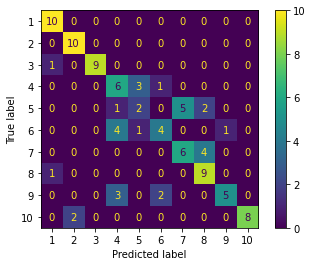

In [70]:
result(lor,lrpred)

# Plotting a receiver operating characteristic

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


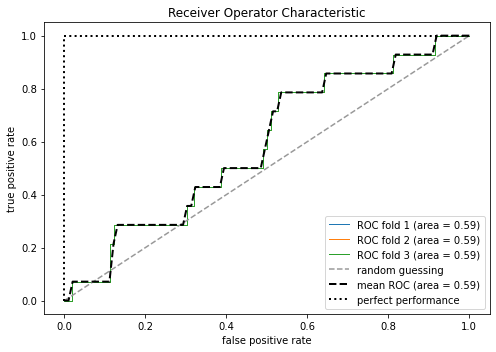

In [71]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])




#cv = StratifiedKFold(y_train,n_folds=3,random_state=1)
    
#else:
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_test,
                         y_test).predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test,
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

In [72]:
pipe_lr = pipe_lr.fit(X_train, y_train)
y_labels = pipe_lr.predict(X_test)
y_probas = pipe_lr.predict_proba(X_test)
# note that we use probabilities for roc_auc
# the `[:, 1]` selects the positive class label only

In [73]:
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_probas,multi_class="ovr"))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_labels))

ROC AUC: 0.682
Accuracy: 0.242


# OBSERVATION

In [74]:
x=[]
x.append(a1*100)
x.append(a2*100)
x.append(a3*100)
x.append(a4*100)
x.append(a5*100)
x.append(a6*100)
x.append(a7*100)

In [75]:
inference={'Model Used':['RandomForests','SVM','AdaBoost','GradientBoost','DecisionTree','KNN','LogisticRegression'],
            'Accuracy Scores(%)':x}

In [76]:
df2=pd.DataFrame(inference)

In [77]:
df2

,Model Used,Accuracy Scores(%)
0,RandomForests,58.0
1,SVM,51.0
2,AdaBoost,27.0
3,GradientBoost,59.0
4,DecisionTree,50.0
5,KNN,44.0
6,LogisticRegression,69.0


# INFERENCE
### Thus accuracy is highest for Logistic regression with 69% and it is the best suited model for the given dataset